## Generate IDPP path and modify 

In [1]:
from pymatgen_diffusion.neb.pathfinder import IDPPSolver
from pymatgen.core import Structure
import numpy as np
import os

In [16]:
# run IDPP
source = "Ag_2"
dirname = "C:\\ComputMatSci\\IDPP_test\\%s\\" % source
init_struct = Structure.from_file(os.path.join(dirname, "POSCAR_ini"), False)
final_struct = Structure.from_file(os.path.join(dirname, "POSCAR_fin"), False)
obj = IDPPSolver.from_endpoints(endpoints=[init_struct, final_struct], nimages=10, sort_tol=0)
idpp_path = obj.run(maxiter=5000, tol=1e-5, gtol=1e-3)

c:\ComputMatSci\IDPP_test\pymatgen\pymatgen-diffusion\pymatgen_diffusion\neb\pathfinder.py:309: UserWarning: Maximum iteration number is reached without convergence!
  UserWarning)


In [21]:
init_struct

Structure Summary
Lattice
    abc : 30.0 30.0 30.0
 angles : 90.0 90.0 90.0
 volume : 27000.0
      A : 30.0 0.0 0.0
      B : 0.0 30.0 0.0
      C : 0.0 0.0 30.0
PeriodicSite: Ag (7.4421, 8.5146, 15.0012) [0.2481, 0.2838, 0.5000]
PeriodicSite: Ag (9.4851, 10.5576, 15.0012) [0.3162, 0.3519, 0.5000]
PeriodicSite: Ag (11.5278, 8.5146, 15.0012) [0.3843, 0.2838, 0.5000]
PeriodicSite: Ag (13.5708, 10.5576, 15.0012) [0.4524, 0.3519, 0.5000]
PeriodicSite: Ag (15.6135, 8.5146, 15.0012) [0.5204, 0.2838, 0.5000]
PeriodicSite: Ag (17.6565, 10.5576, 15.0012) [0.5885, 0.3519, 0.5000]
PeriodicSite: Ag (19.6992, 8.5146, 15.0012) [0.6566, 0.2838, 0.5000]
PeriodicSite: Ag (7.4421, 12.6003, 15.0012) [0.2481, 0.4200, 0.5000]
PeriodicSite: Ag (9.4851, 14.6433, 15.0012) [0.3162, 0.4881, 0.5000]
PeriodicSite: Ag (11.5278, 12.6003, 15.0012) [0.3843, 0.4200, 0.5000]
PeriodicSite: Ag (13.5708, 14.6433, 15.0012) [0.4524, 0.4881, 0.5000]
PeriodicSite: Ag (15.6135, 12.6003, 15.0012) [0.5204, 0.4200, 0.5000]
Perio

In [5]:
# remove clash
clash_removed_path, attr_force_log, attr_index_log, rpl_force_log, rpl_index_log, disp_log = obj.clash_removal(idpp_path, steric_threshold=2.7, max_bond_length=2.9, max_iter=200, k_bonded=0.1,base_step=0.01, max_step=0.05)

c:\ComputMatSci\IDPP_test\pymatgen\pymatgen-diffusion\pymatgen_diffusion\neb\pathfinder.py:528: UserWarning: Maximum iteration number is reached without convergence!
  UserWarning)


In [17]:
# rerun
obj_rerun = IDPPSolver(clash_removed_path)
rerun_path = obj_rerun.rerun(maxiter = 5000, tol=1e-5, gtol=1e-3)

## Saving data

In [17]:
# create saving folder
from datetime import datetime
now = datetime.now()
today = now.strftime("%Y%m%d")
path = os.path.join("C:\\ComputMatSci\\IDPP_test\\pymatgen\\%s\\" %source, today)
if not os.path.exists(path):
    os.mkdir(path)
i = 1
saveDir = os.path.join(path,"%s_test_%02d"%(today,i))
while(os.path.exists(saveDir)): 
    i += 1
    saveDir = os.path.join(path,"%s_test_%02d"%(today,i))
os.mkdir(saveDir)


In [18]:
# save structures as POSCAR
result = clash_removed_path
for n,struct in enumerate(result):
    os.mkdir("%s\\%02d" % (saveDir,n))
    struct.to(fmt="poscar",filename="%s\\%02d\\POSCAR" % (saveDir,n))

In [19]:
# save f_log and disp_log
np.savetxt(os.path.join(saveDir, "attr_force_log.txt"), attr_force_log)
np.savetxt(os.path.join(saveDir, "rpl_force_log.txt"), rpl_force_log)
np.savetxt(os.path.join(saveDir, "attr_index_log.txt"), attr_index_log)
np.savetxt(os.path.join(saveDir, "rpl_index_log.txt"), rpl_index_log)
np.savetxt(os.path.join(saveDir, "disp_log.txt"), disp_log)

In [ ]:
# output log
with open(os.path.join(saveDir, "log.txt"),"a" ) as f:
    log = "r = %d \nmax_bond_length = %f\nradius = %f\nmax_iteration = %d\ntolerance = %d\ngtolerance%d" % (5, 4.09, 1.44, 5000, 1e-5, 1e-3)
    f.write(log)
    f.close()
# save probes
with open(os.path.join(saveDir, "d_3-4.txt"),"w") as f:
    for i in probe1:
        f.write("%f\n" % i)
with open(os.path.join(saveDir, "d_3-9.txt"),"w") as f:
    for i in probe2:
        f.write("%f\n" % i)
with open(os.path.join(saveDir, "d_3-10.txt"),"w") as f:
    for i in probe3:
        f.write("%f\n" % i)

np.savetxt(os.path.join(saveDir, "d_26.txt"),d_26)

with open(os.path.join(saveDir, "neighbor_26.txt"),"w") as f:
    for i in range(len(n_26)):
        f.write("iteration %d \n" % i)
        for ni in n_26[i]:
            f.write(str(ni)+"\n")

## Plot

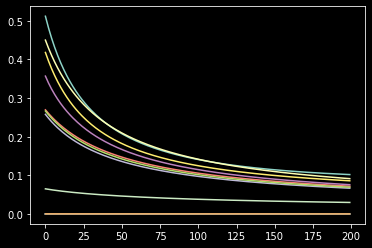

In [1]:
import matplotlib.pyplot as plt
import numpy as np

attr_force = np.loadtxt("C:\\ComputMatSci\\IDPP_test\\pymatgen\\Ag_2\\20191029\\20191029_test_03\\attr_force_log.txt")
ax1 = plt.subplot(311)
plt.plot(attr_force)
plt.show()

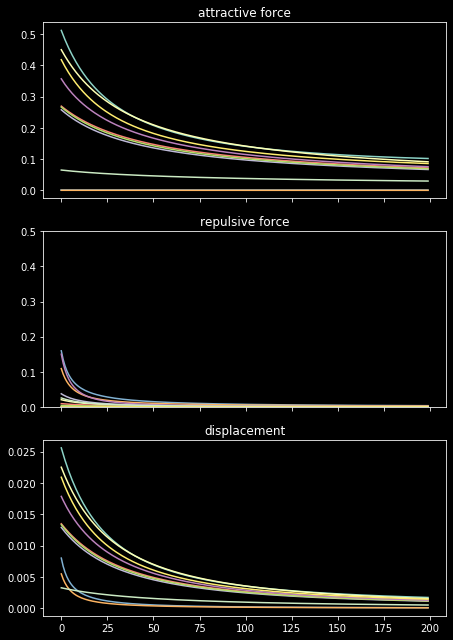

In [7]:
import matplotlib.pyplot as plt
import numpy as np

path = "C:\\ComputMatSci\\IDPP_test\\pymatgen\\Ag_2\\20191029\\20191029_test_04"
attr_force = np.loadtxt("%s\\attr_force_log.txt" % path)
rpl_force = np.loadtxt("%s\\rpl_force_log.txt" % path)
disp = np.loadtxt("%s\\disp_log.txt" % path)


y_lb = 0
y_ub = 0.5
plt.figure(figsize=[6.4, 9])

ax1 = plt.subplot(311)
plt.plot(attr_force)
ax1.set_title("attractive force")

plt.setp(ax1.get_xticklabels(),visible=False)

ax2 = plt.subplot(312)
plt.plot(rpl_force)
ax2.set_ylim(0,0.5)
ax2.set_title("repulsive force")

plt.setp(ax2.get_xticklabels(),visible=False)

ax3 = plt.subplot(313)
plt.plot(disp)
ax3.set_title("displacement")

# plt.title("different step size dynamics (all initial step sizes are 0.005 ")
plt.tight_layout()
plt.show()

In [11]:
import matplotlib.pyplot as plt
import numpy as np

attr_force_03 = np.loadtxt("C:\\ComputMatSci\\IDPP_test\\pymatgen\\Ag_2\\20191028\\20191028_test_01\\rpl_force_log.txt")
attr_force_04 = np.loadtxt("C:\\ComputMatSci\\IDPP_test\\pymatgen\\Ag_2\\20191028\\20191028_test_04\\rpl_force_log.txt")
attr_force_05 = np.loadtxt("C:\\ComputMatSci\\IDPP_test\\pymatgen\\Ag_2\\20191028\\20191028_test_05\\rpl_force_log.txt")
attr_force_06 = np.loadtxt("C:\\ComputMatSci\\IDPP_test\\pymatgen\\Ag_2\\20191028\\20191028_test_06\\rpl_force_log.txt")
attr_force_01 = np.loadtxt("C:\\ComputMatSci\\IDPP_test\\pymatgen\\Ag_2\\20191029\\20191029_test_02\\rpl_force_log.txt")

x = np.arange(200)
y_lb = 0
y_ub = 0.5
plt.figure(figsize=[6.4, 15])

ax1 = plt.subplot(511)
plt.plot(x, attr_force_03)
ax1.set_title("decay 0.01")
ax1.set_ylim(y_lb, y_ub)
plt.setp(ax1.get_xticklabels(),visible=False)

ax2 = plt.subplot(512)
plt.plot(attr_force_04)
ax2.set_title("linear increase")
ax2.set_ylim(y_lb, y_ub)
plt.setp(ax2.get_xticklabels(),visible=False)

ax3 = plt.subplot(513)
plt.plot(attr_force_05)
ax3.set_title("exponentially increase *2")
ax3.set_ylim(y_lb, y_ub)
plt.setp(ax3.get_xticklabels(),visible=False)

ax4 = plt.subplot(514)
plt.plot(attr_force_06)
ax4.set_title("*1.2 or reject")
ax4.set_ylim(y_lb, y_ub)

ax5 = plt.subplot(515)
plt.plot(attr_force_01)
ax5.set_title("cyclic step size")
ax5.set_ylim(y_lb, y_ub)

# plt.title("different step size dynamics (all initial step sizes are 0.005 ")
plt.tight_layout()
plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def _get_triangular_step(iteration, half_period=5, base_step=0.05, max_step=0.1):
    """
    Given the inputs, calculates the step_size that should be applicable
    for this iteration using CLR technique from Anand Saha
    (http://teleported.in/posts/cyclic-learning-rate/).
    """
    cycle = np.floor(1 + iteration/(2 * half_period))
    x = np.abs(iteration/half_period - 2 * cycle + 1)
    step = base_step + (max_step - base_step) * np.maximum(0, (1-x))
    return step

x = np.arange(200)
y = np.array(list(map(_get_triangular_step, x)))
plt.plot(x,y)
plt.show()

## Testing

In [4]:
# check d_26
count = 0
for i in d_26:
    for j in i:
        diff = abs(j - 2.88)
        if (diff < 0.01 ):
            count += 1
print(count)

In [6]:
import itertools
too_close = []
too_far = []
for ni in range(10):
    for i, j in itertools.combinations(range(26),2):
        d = target_dists[ni][i][j]
        if (d < 5 and d > 4.09 ):
            too_far.append("image: %d i: %d j: %d d_ij: %f" % (ni, i, j, d))
        if (d < 2.88 and d > 0):
            too_close.append("image: %d i: %d j: %d d_ij: %f" % (ni, i, j, d))

In [53]:
from operator import attrgetter, itemgetter
n = init_struct.get_all_neighbors(r=3)
n[0].sort(key=attrgetter('distance'))
n[0].attrgetter('distance')

In [4]:
for i in range(5):
    print("-----%d-----" %i)
    for j in range(5):
        if j > 4:
            break
        print(j)

In [1]:
a= (89+72+94+69)/4

81.0